In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_df = pd.read_csv("../data/Weather.csv", parse_dates=['datetime'])
weather_df.dtypes

Unnamed: 0                   int64
name                        object
datetime            datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
precipcover                float64
preciptype                  object
snow                       float64
snowdepth                  float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset              

In [ ]:
crimes_df = pd.read_csv("../data/Crimes.csv", parse_dates=["FIRST_OCCURRENCE_DATE", "LAST_OCCURRENCE_DATE", "REPORTED_DATE"])
weather_df = pd.read_csv("../data/Weather.csv", parse_dates=['datetime'])

crimes_df['DATE'] = crimes_df['FIRST_OCCURRENCE_DATE'].dt.date
weather_df['DATE'] = weather_df['datetime'].dt.date

weather_df = weather_df[['DATE', 'temp', 'precip', 'snow', 'conditions']]
weather_df['TEMP'] = weather_df['temp']
weather_df['PRECIP'] = weather_df['precip']
weather_df['SNOW'] = weather_df['snow']
weather_df['CONDITIONS'] = weather_df['conditions']

weather_df = weather_df.drop(columns=['temp', 'precip', 'snow', 'conditions'])

df = crimes_df.merge(weather_df, on="DATE", how='inner')

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_92914/2143945231.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_df = pd.read_csv("../data/DenverCrimesData.csv", parse_dates=["FIRST_OCCURRENCE_DATE", "LAST_OCCURRENCE_DATE", "REPORTED_DATE"])


In [84]:
count_days = df[['DATE', 'CONDITIONS']].drop_duplicates().sort_values(by="DATE", ascending=True)
condition_days = count_days['CONDITIONS'].value_counts()

In [85]:
weather_crimes_df = df.groupby(['CONDITIONS', 'OFFENSE_CATEGORY_ID']).size().reset_index(name="COUNT")
weather_crimes_df = weather_crimes_df.merge(condition_days, on="CONDITIONS", how="inner")
weather_crimes_df['CRIMES_PER_DAY'] = weather_crimes_df['COUNT'] / weather_crimes_df['count']

In [86]:
weather_pivot_df = weather_crimes_df.pivot(index='CONDITIONS', columns='OFFENSE_CATEGORY_ID', values="CRIMES_PER_DAY").fillna(0)

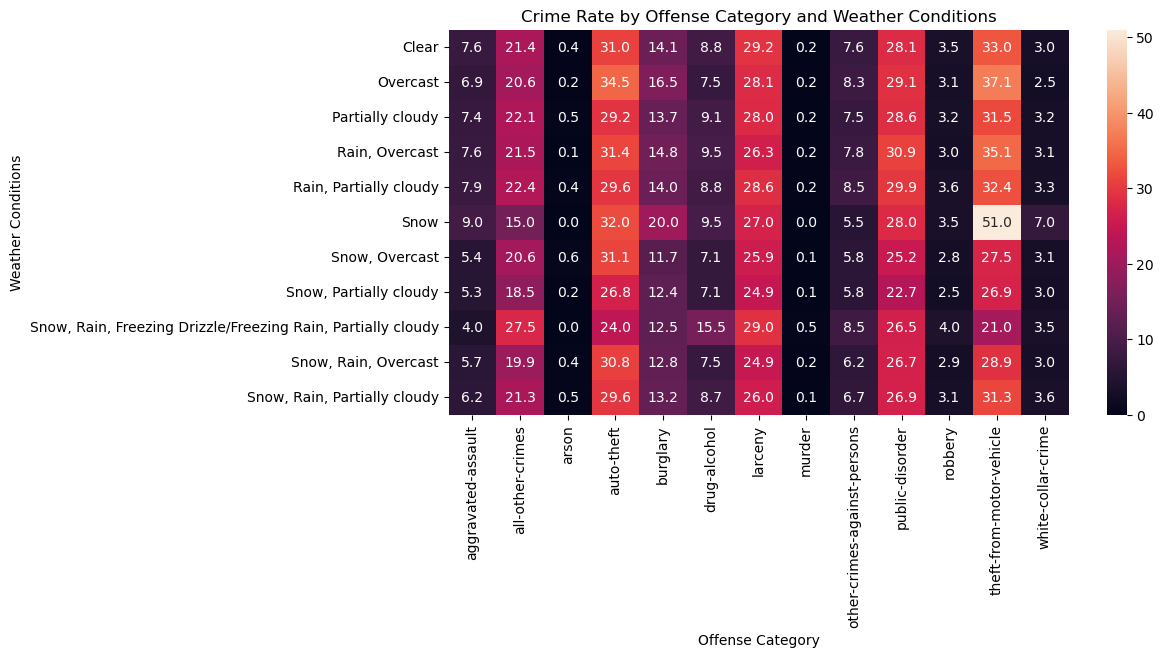

In [87]:
plt.figure(figsize=(10, 5))

sns.heatmap(weather_pivot_df, annot=True, fmt=".1f")

plt.title('Crime Rate by Offense Category and Weather Conditions')
plt.xlabel('Offense Category')
plt.ylabel('Weather Conditions')
plt.show()